# Importing the Modules

In [131]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# For data loading
from pathlib import Path

# Library for statistics
from scipy import stats
from scipy.stats import norm, skew, pearsonr
from numpy import percentile
from numpy.random import rand

In [18]:
file_path = Path("C:/Users/jpndu/Class/MachineLearningRealEstatePredictions/realty_raw_set.csv")
housing_df = pd.read_csv(file_path, index_col = 0)
housing_df.head()

,Price,Address,zip,status,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT
ID,,,,,,,,,
1,427167,3231 W MARYLAND AVE,85017,Active,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0
2,400000,5109 E THOMAS RD,85018,Active,PAPAGO VILLAGE,1943,0,0.0,1358.0
3,399900,8020 W STELLA AVE,85303,Active,SHALIMAR,1997,3,2.0,1505.0
4,349000,6944 W Verde LN,85033,Active,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0
5,419000,4105 W PASADENA AVE,85019,Active,TU-DOR ESTATES,1971,4,2.0,1908.0


In [19]:
# Check data type and make sure that our data is clean (has no null values, etc)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 1 to 1073
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1073 non-null   int64  
 1   Address      1073 non-null   object 
 2   zip          1073 non-null   int64  
 3   status       1073 non-null   object 
 4   Subdivision  1071 non-null   object 
 5   Year Built   1073 non-null   int64  
 6   Bedrooms     1073 non-null   int64  
 7   Bathrooms    1073 non-null   float64
 8   Approx SQFT  1073 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 83.8+ KB


In [21]:
# Reorder columns
housing_df = housing_df[["Address", "Subdivision", "zip", "status", "Year Built", "Approx SQFT", "Bedrooms", "Bathrooms",
                        "Price"]]
housing_df.head()

,Address,Subdivision,zip,status,Year Built,Approx SQFT,Bedrooms,Bathrooms,Price
ID,,,,,,,,,
1,3231 W MARYLAND AVE,WEST PLAZA 6 LOT 614-787,85017,Active,1958,1302.0,3,2.0,427167
2,5109 E THOMAS RD,PAPAGO VILLAGE,85018,Active,1943,1358.0,0,0.0,400000
3,8020 W STELLA AVE,SHALIMAR,85303,Active,1997,1505.0,3,2.0,399900
4,6944 W Verde LN,MARYVALE TERRACE NO. 49,85033,Active,1983,1514.0,3,3.0,349000
5,4105 W PASADENA AVE,TU-DOR ESTATES,85019,Active,1971,1908.0,4,2.0,419000


[Text(-200000.0, 0, '-200000.00'),
 Text(0.0, 0, '0.00'),
 Text(200000.0, 0, '200000.00'),
 Text(400000.0, 0, '400000.00'),
 Text(600000.0, 0, '600000.00'),
 Text(800000.0, 0, '800000.00'),
 Text(1000000.0, 0, '1000000.00'),
 Text(1200000.0, 0, '1200000.00')]

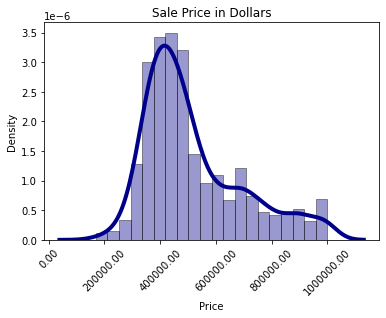

In [140]:
# Density Plot and Histogram of the house price
sns.distplot(housing_df['Price'], hist=True, 
             kde=True, 
             bins=int(100/5), 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},).set_title('Sale Price in Dollars')
# plt.xlim([30000,1300000])
plt.xticks(rotation=45)
# after plotting the data, format the labels
current_values = plt.gca().get_xticks()
# using format string 
plt.gca().set_xticklabels(['{:.2f}'.format(x) for x in current_values])

In [145]:
# House price statistics
# calculate quartiles
quartiles = percentile(housing_df['Price'], [25, 50, 75])
# calculate min/max
data_min, data_max = housing_df['Price'].min(), housing_df['Price'].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

# Mean and Mode
Mean = housing_df['Price'].mean()
Mode = housing_df['Price'].mode()

print('Mean: %.3f' % Mean)
print('Mode: %.3f' % Mode)

Min: 169000.000
Q1: 390000.000
Median: 462320.000
Q3: 600000.000
Max: 1000000.000
Mean: 515795.279
Mode: 450000.000


In [64]:
# Creating a subset of the housing dataset
housing_subset_df = housing_df[["Approx SQFT", "Bedrooms", "Bathrooms", "Price"]]
housing_subset_df.head()

,Approx SQFT,Bedrooms,Bathrooms,Price
ID,,,,
1,1302.0,3,2.0,427167
2,1358.0,0,0.0,400000
3,1505.0,3,2.0,399900
4,1514.0,3,3.0,349000
5,1908.0,4,2.0,419000


In [66]:
# Correlation
corr = housing_subset_df.corr().round(2)
corr

,Approx SQFT,Bedrooms,Bathrooms,Price
Approx SQFT,1.00,0.61,0.68,0.59
Bedrooms,0.61,1.00,0.59,0.24
Bathrooms,0.68,0.59,1.00,0.46
Price,0.59,0.24,0.46,1.00


<AxesSubplot:>

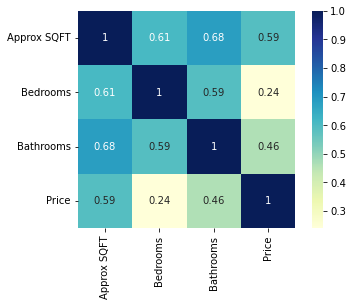

In [152]:
# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu",
        square=True,annot=True,cbar=True)

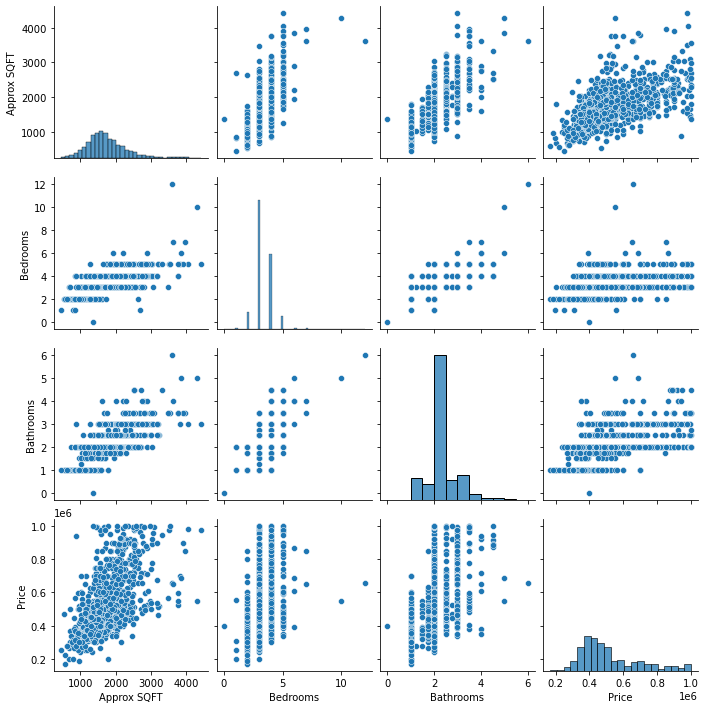

In [154]:
# correlogram
sns.pairplot(housing_subset_df)
plt.show()

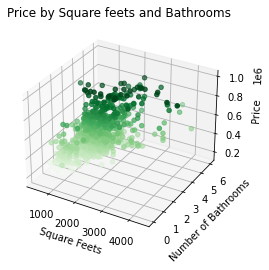

In [167]:
# Data for three-dimensional for Price vs the most impactful features (e.i., Approx SQFT, Bathrooms)
ax = plt.axes(projection='3d')
zdata = housing_df['Price']
xdata = housing_df['Approx SQFT']
ydata = housing_df['Bathrooms']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.set_title("Price by Square feets and Bathrooms")
ax.set_xlabel("Square Feets")
ax.set_ylabel("Number of Bathrooms")
ax.set_zlabel("Price");

Text(0.5, 1.0, 'House Square Feets')

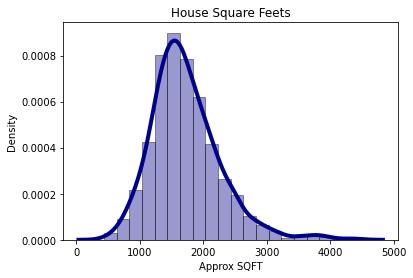

In [70]:
# Density Plot and Histogram of the house square feets
sns.distplot(housing_df['Approx SQFT'], hist=True, 
             kde=True, 
             bins=int(1000/50), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},).set_title('House Square Feets')

In [146]:
# House square feets statistics
# calculate quartiles
quartiles = percentile(housing_df['Approx SQFT'], [25, 50, 75])
# calculate min/max
data_min, data_max = housing_df['Approx SQFT'].min(), housing_df['Approx SQFT'].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

# Mean and Mode
Mean = housing_df['Approx SQFT'].mean()
Mode = housing_df['Approx SQFT'].mode()

print('Mean: %.3f' % Mean)
print('Mode: %.3f' % Mode)

Min: 442.000
Q1: 1372.000
Median: 1651.000
Q3: 2002.000
Max: 4423.000
Mean: 1726.404
Mode: 1260.000


Text(0.5, 1.0, 'House Bedrooms')

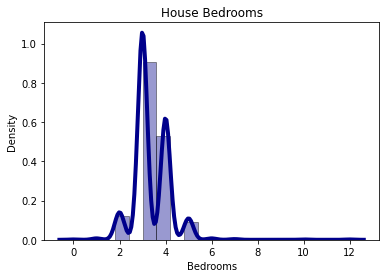

In [71]:
# Density Plot and Histogram of the house bedrooms
sns.distplot(housing_df['Bedrooms'], hist=True, 
             kde=True, 
             bins=int(1000/50), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},).set_title('House Bedrooms')

In [147]:
# House bedrooms statistics
# calculate quartiles
quartiles = percentile(housing_df['Bedrooms'], [25, 50, 75])
# calculate min/max
data_min, data_max = housing_df['Bedrooms'].min(), housing_df['Bedrooms'].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

# Mean and Mode
Mean = housing_df['Bedrooms'].mean()
Mode = housing_df['Bedrooms'].mode()

print('Mean: %.3f' % Mean)
print('Mode: %.3f' % Mode)

Min: 0.000
Q1: 3.000
Median: 3.000
Q3: 4.000
Max: 12.000
Mean: 3.381
Mode: 3.000


Text(0.5, 1.0, 'Bathrooms')

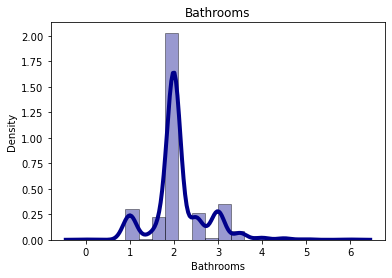

In [134]:
# Density Plot and Histogram of the house bathrooms
sns.distplot(housing_df['Bathrooms'], hist=True, 
             kde=True, 
             bins=int(1000/50), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},).set_title('Bathrooms')

In [148]:
# House bathdrooms statistics
# calculate quartiles
quartiles = percentile(housing_df['Bathrooms'], [25, 50, 75])
# calculate min/max
data_min, data_max = housing_df['Bathrooms'].min(), housing_df['Bathrooms'].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

# Mean and Mode
Mean = housing_df['Bathrooms'].mean()
Mode = housing_df['Bathrooms'].mode()

print('Mean: %.3f' % Mean)
print('Mode: %.3f' % Mode)

Min: 0.000
Q1: 2.000
Median: 2.000
Q3: 2.000
Max: 6.000
Mean: 2.110
Mode: 2.000
